In [4]:
import numpy as np
from datascience import *
from math import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # error: plots --> plt

# Resampling with Replacement

Why do we resample with replacement? How is that different from resample without replacement? 

Recall that, in bootstrapping, we will resample with replacement the same sample size.

In [8]:
# This data are midterm scores from CS61A, Fall 2017
scores = Table().read_table("scores.csv")

mt1_scores = scores.select("MT1 %")
mt1_scores.show(5)

MT1 %
70
71.25
58.75
61.25
71.25


In [9]:
# What is the original mean?
np.mean(mt1_scores.column(0))


70.28117451690821

In [10]:
# What if we sampled withOUT replacement?
scores_n = scores.num_rows

wo_replacement = mt1_scores.sample(scores_n, with_replacement = False)
wo_replacement.show(5)

MT1 %
80
83.75
62.5
76.25
95


In [11]:
# Mean without replacement, same sample size
np.mean(wo_replacement.column(0))

# Why did we get the same mean as the original dataset?

# sample without replacement, the same sample size
# shuffling/permuting the data --> A/B test

70.28117451690821

In [21]:
# Now, what if we sample with replacement?
w_replacement = mt1_scores.sample(scores_n, with_replacement = True)
w_replacement.show(5)

MT1 %
83.75
77.5
77.5
53.75
60


In [22]:
# Mean with replacement, same sample size
np.mean(w_replacement.column(0))

# we either include multiple copies of the same value
# and/or we exclude some other values


69.94376509661836

## Bootstrapping: What is the average MT1 score?

The `scores` dataset is population-level; in other words, it has all of the information for every student in the class. That isn't good for our purpose, since there is no reason for us to do inferential statistics if we have all of the data. 

(Note: this does not happen very often at all; you'll usually start off with a sample.)

Instead, let's imagine we randomly asked a sample of 60 students what they got on MT1. Then, let's use that sample of 60 to estimate what the whole class got on the exam.

In [55]:
np.random.seed(3) # pre-determines the random result you will get
np.random.choice(np.arange(1, 11))

9

In [26]:
np.random.seed(12345) # So we all get the same data

class_sample = mt1_scores.sample(60, with_replacement = False)
class_sample.show(5)

MT1 %
87.5
67.5
85
58.75
68.75


In [27]:
np.mean(class_sample.column(0))

70.27083333333333

In [40]:
## Question 1: Let's practice taking a resample with replacement.
one_resample = class_sample.sample()
# by default: same sample size as tbl, with replacement
one_resample

MT1 %
38.75
56.25
92.5
61.25
82.5
81.25
100
98.75
68.75
100


In [32]:
# Did we get some variation?
np.mean(class_sample.column(0)) == np.mean(one_resample.column(0))

False

In [57]:
# Question 2: Resampling with replacement... many times (let's try 1000!)
# calculate the statistic for each resample

def bootstrap_stats(tbl, repetitions):
    """
    tbl = your data, a 1-column table of numerical scores
    repetitions = num bootstrap repetitions/resamples
    """
    # Storage array for each resampled statistic (mean)
    bootstrap_stats = make_array() 

    # Iterate to create many different resamples, and calculate each individual mean
    for i in np.arange(repetitions):
        resample = tbl.sample(tbl.num_rows, with_replacement = True)
        resample_stat = np.mean(resample.column(0))
        bootstrap_stats = np.append(bootstrap_stats, resample_stat)

    # return the resampled statistic
    return bootstrap_stats

mt1_resampled_scores = bootstrap_stats(class_sample, 2000)

In [ ]:
# sampling in datascience, given a table: 
tbl.sample(tbl.num_rows, with_replacement = True)

# sampling in numpy, given an array:
np.random.choice(array, size = len(array), replace = True)

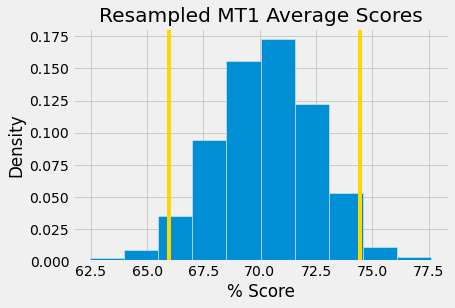

In [69]:
## Question 3: Make a histogram of the resampled statistics

#Table().with_column("Resampled Mean Scores", mt1_resampled_scores).hist()
plt.hist(mt1_resampled_scores, density = True);
plt.title("Resampled MT1 Average Scores");
plt.ylabel("Density");
plt.xlabel("% Score")
plt.axvline(lower_bound, color = "gold");
plt.axvline(upper_bound, color = "gold");

In [67]:
## Question 4: Calculate a 95% confidence interval.
# Hint: use the percentile function! It takes in 2 arguments,
# the percent and the array of values

lower_bound = percentile(2.5, mt1_resampled_scores) # datascience approach
upper_bound = np.percentile(mt1_resampled_scores, 97.5) # numpy approach

[lower_bound, upper_bound]

[65.95833333333333, 74.43802083333333]

In [66]:
# Finding bounds: confidence = C%
# exclude = 100 - C% = X
# Lower bound = 0 + X/2 = percentile for lower bound
# Upper bound = 100 - X/2 = percentile for upper bound

# 80% interval:
# X = 100 - 80 = 20%
# Lower = 0 + (20/2) = 10% 
# Upper = 100 - (20/2) = 90%
# checking: upper - lower == C%
# 90 - 10 = 80%

## What do we conclude about the MT1 score based on the interval above?

[65.95833333333333, 74.43802083333333]

With 95% confidence, the average MT1 score for the population (CS61A in Fall 2017) is (most likely) between 65.95% and 74.44%. 

"The probability of the true mean being between 65.95% and 74.44% is 95%." <-- DON'T SAY THIS

In [70]:
# The true MT1 score:
true_val = np.mean(mt1_scores.column(0))
true_val

# we made a "good" interval! 

70.28117451690821

In [78]:
## Properties of intervals: what does confidence mean?

def fast_intervals():
    # Take a large, random sample without replacement (SRS)
    our_large_sample = np.random.choice(mt1_scores.column(0), size = 60, replace = False)
    scores = []
    for i in np.arange(1000):
        # Resample with replacement
        sample = np.random.choice(our_large_sample, size = 60, replace = True)
        # Calculate the resample statistic
        scores.append(np.mean(sample))
    # Generate an interval using percentiles
    left, right = np.percentile(scores, 10), np.percentile(scores, 90) # 80% interval
    return left, right

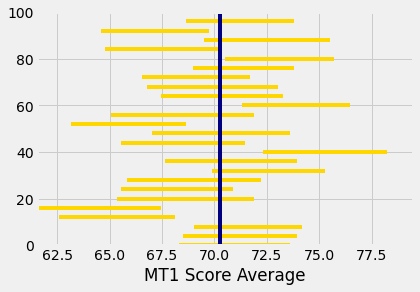

In [79]:
# Making some intervals and a graph; it'll take a sec
intervals = [fast_intervals() for i in range(100)]
bounds = list(zip(*intervals))

plt.xlim(min(bounds[0]), max(bounds[1]));
plt.ylim(0, 100);
step = 0
for interval in intervals:
    plt.plot(interval, (step, step), color = "gold");
    step += 4

plt.axvline(true_val, color = "navy");
plt.xlabel("MT1 Score Average");

In [80]:
# Confidence refers to process of making intervals
# from: taking a large random sample --> calculating the percentiles of the resampled statistics
captured = 0
for i in intervals:
    captured = captured + (i[0] <= true_val <= i[1]) # Did this interval capture the parameter?
    
captured # Number of intervals that got the parameter, out of 100

79

In [77]:
# Manually creating + checking many intervals can be computationally intensive
# But in theory, if we made 10000 intervals, ? will capture true_val

# confidence = 80% --> cutoff would be 20% --> 20% will miss
# confidence = 95% --> cutoff of 5% --> 5% will miss
# 99% --> cutoff of 1% --> 1% of intervals we make will "miss"

num_good_intervals = 0.80 * 10000
num_good_intervals

8000.0

## Hypothesis testing with confidence intervals

Remember from a few weeks ago, we had a hunch that MT2 was significantly more difficult than MT1 in this dataset, and we proved it with a hypothesis test.  

If it was more difficult, this would influence any further analysis we do with the data -- if the means were significantly different, we should not do a simple comparison between exam 1 and exam 2, since our analysis will reflect the difficulty of the exams moreso than an individual's improvement.

So: let's figure out if there was a significant difference! Let's use a different approach - we can use hypothesis testing with a confidence interval. 

In [81]:
# Imagine we have a sample of 60 students, or 2 lab sections. 
np.random.seed(12345);

exams = Table().read_table("scores.csv").sample(60, with_replacement = False)
exams.show(5)

Mentored,MT1 %,MT2 %,difference
False,87.5,94,6.5
False,67.5,41,-26.5
False,85,97,12
False,58.75,35,-23.75
True,68.75,60,-8.75


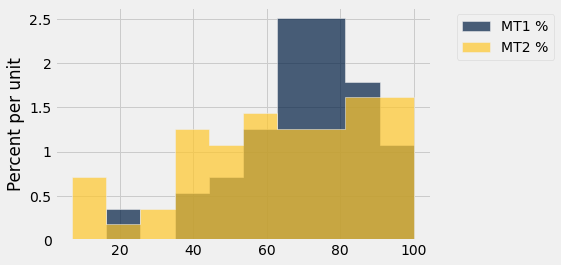

In [82]:
# Let's compare the distributions.
exams.hist(["MT1 %", "MT2 %"])

**In this cell, answer the following:**

What is our test statistic?
X = Average difference between MT2 - MT1


What is our null hypothesis?
X = 0


What is our alternative hypothesis?
X != 0



In [84]:
exams.column("difference")

array([  6.5 , -26.5 ,  12.  , -23.75,  -8.75, -31.25, -15.75,  10.5 ,
        14.5 ,  10.  ,  -9.75,   3.75,   0.25, -37.  , -34.25, -22.25,
         0.75,  12.5 , -34.5 , -31.75,  -1.  , -12.  ,  -3.25,  -4.75,
        -5.  , -12.5 , -35.5 , -19.25,  -7.75, -19.25,   2.75, -23.5 ,
        10.  , -13.5 ,  11.25, -28.25,  -3.25,  10.  ,  -1.5 , -20.75,
         7.  ,  28.75, -16.75,   6.5 ,  -4.5 ,  -5.  , -19.25,   0.5 ,
        10.75,  -5.  , -11.  ,  -1.  , -30.25,   4.  ,   9.25,  -8.75,
       -22.5 ,  -1.25,  -8.75,  15.25])

In [85]:
# So, was there a difference between the two exams, given (MT2 - MT1)?
# Q1: Calculate the observed statistic from the dataset. 
# Hint -- we did most of this for you already (look at exams)

obs_diff = np.average(exams.column("difference"))
obs_diff

-7.229166666666667

In [86]:
# Let's go bootstrap! Let's do 1000 repetitions
exam_diffs = exams.select("difference")

resamp_diff_means = bootstrap_stats(exam_diffs, 1000)
resamp_diff_means

array([ -7.375     ,  -8.75      , -11.2125    ,  -5.82916667,
        -9.57083333,  -6.075     ,  -7.2       ,  -2.72916667,
        -7.2375    ,  -6.35416667,  -7.70833333, -11.17916667,
       -12.3       ,  -9.12916667, -10.375     ,  -8.1       ,
        -5.5625    ,  -8.5125    ,  -5.1625    ,  -8.35833333,
        -6.24166667,  -6.47916667, -13.64583333, -10.11666667,
        -8.69166667,  -9.42916667,  -4.35416667,  -7.96666667,
        -7.625     ,  -7.00416667, -12.0875    ,  -7.9375    ,
        -9.46666667, -11.4375    ,  -6.20416667,  -7.24583333,
        -8.46666667,  -3.925     , -10.31666667,  -9.525     ,
        -7.73333333,  -4.7625    ,  -5.50416667,  -7.80416667,
        -7.35416667,  -7.71666667,  -2.39166667,  -7.18333333,
        -5.18333333,  -8.10416667,  -6.29166667,  -3.44583333,
        -6.91666667,  -7.97916667,  -5.55      ,  -6.09166667,
        -6.70416667,  -7.22083333,  -8.35416667,  -4.60833333,
        -7.25416667, -11.22916667,  -7.35833333,  -6.75

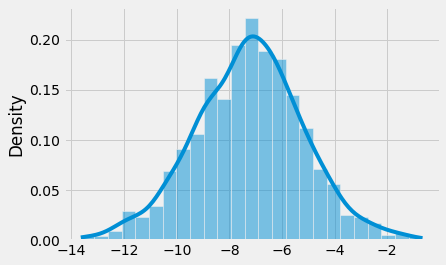

In [89]:
import seaborn as sns # aesthetic matplotlib, with more statistical plots

sns.histplot(resamp_diff_means, stat = "density", kde = True); #kde = kernel density estimator, a smoothed curve

In [90]:
# Q3: Calculate a 90% interval for this data. 
# Bonus: what is our p-value cutoff/level of significance?

# c = 90
# x = 100 - 90 = 10
# lower = 0 + 10/2 = 5
# upper = 100 - 10/2 = 95
# 95 - 5 = 90 = c

lower = percentile(5, resamp_diff_means)
upper = percentile(95, resamp_diff_means)

[lower, upper]

[-10.641666666666667, -3.970833333333333]

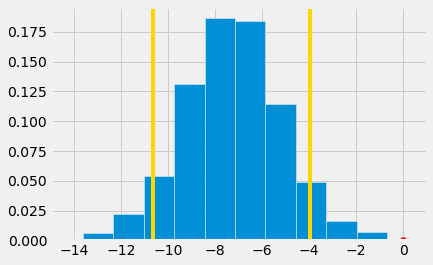

In [95]:
# Q4: Finally, graph the distribution of resampled means.
# use plt (matplotlib.pyplot) to show the bounds of the interval.

plt.hist(resamp_diff_means, density = True);
plt.xlim(-15, 1);
plt.scatter(0, 0, color = "red"); # null estimate
plt.axvline(lower, color = "gold"); # 5%ile
plt.axvline(upper, color = "gold"); # 95%ile

# if we assume this gold interval captured the parameter
# null assumption that the difference = 0 is probably wrong


In [ ]:
# Q5: What is our conclusion?
# What does this mean for our data and our analysis?
reject_null = True


In [97]:
# The true value from the pop:
np.mean(scores.column("difference"))

-8.188783212560386

In [ ]:
# So, this tells us we need to standardize the data - MT2 was probably more difficult than MT1 for some reason
# Make MT1 the same units as MT2: standard units, z-score
# (student score - mean of scores) / std of scores
# We'll use this idea for linear regression in 2 weeks!